# Data Exploration - Preprocessing

1. Normalise X data (/255?)

2. Umbrella categories and One-hot-encode them

In [1]:
from PIL import Image
import os
import pandas as pd

In [3]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
images_folder = os.path.join(parent_directory, 'raw_data', 'Images')
images_name = os.listdir(images_folder)

## Check for missing images

In [4]:
missing_images = []

for filename in os.listdir(images_folder):
    try:
        # Attempt to open the image
        image = Image.open(os.path.join(images_folder, filename))

        # Check if the image is empty (has no pixels)
        if image.width == 0 or image.height == 0:
            missing_images.append(filename)

        # Close the image
        image.close()
    except (IOError, OSError):
        # An error occurred while opening the image
        missing_images.append(filename)

missing_images

[]

## Check for average colour

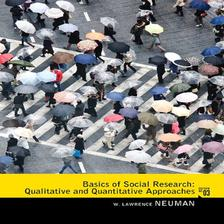

In [5]:
first_image =  os.path.join(images_folder, images_name[0])
Image.open(first_image)

In [6]:
def extract_mean_color(image_path):
    image = Image.open(image_path)
    
    # convert to RGB format
    image = image.convert('RGB')
    
    # image dimensions
    widht, height = image.size
    
    # initialise sums for each color
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for y in range(height):
        for x in range(widht):
            r, g, b = image.getpixel((x, y))
            sum_red += r
            sum_green += g
            sum_blue += b
    
    num_pixels = height * widht
    mean_red = sum_red / num_pixels
    mean_green = sum_green / num_pixels
    mean_blue = sum_blue / num_pixels
    
    return (mean_red, mean_green, mean_blue)
            
    

In [7]:
images_mean_colour = []
images_name_head = images_name[0:5]
for image_name in images_name_head:
    current_image = os.path.join(images_folder, image_name)
    mean_color = extract_mean_color(current_image)
    images_mean_colour.append(mean_color)

# images_mean_colour

## Check shapes and sizes

In [8]:
def extract_sizes(images_folder):
    images_name = os.listdir(images_folder)
    
    # empty set to store unique sizes
    image_sizes = set()
    
    # iterate through images
    for image_name in images_name:
        image_path = os.path.join(images_folder, image_name)
        image = Image.open(image_path)
        
        # get size
        image_size = image.size
        image_sizes.add(image_size)
        
        image.close()
    
    return image_sizes
    
    

In [9]:
extract_sizes(images_folder)

{(224, 224)}

## Look into y_train (no need to separate into columns)

In [10]:
df_y_train = pd.read_csv("../raw_data/train_y.csv", delimiter=" ", index_col="Id")

In [11]:
df_y_train.tail()

,Genre_id,Genre_name
Id,,
51295,17,"Mystery, Thriller & Suspense"
51296,17,"Mystery, Thriller & Suspense"
51297,17,"Mystery, Thriller & Suspense"
51298,17,"Mystery, Thriller & Suspense"
51299,17,"Mystery, Thriller & Suspense"


In [52]:
unique_genres = df_y_train['Genre_id'].unique()
unique_genres.sort()

for genre in unique_genres:
    print(genre)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [53]:
df_y_train['Genre_name'].unique()

array(['Biographies & Memoirs', "Children's Books",
       'Engineering & Transportation', 'Christian Books & Bibles',
       'Sports & Outdoors', 'Health, Fitness & Dieting', 'Medical Books',
       'Science & Math', 'Travel', 'Business & Money',
       'Cookbooks, Food & Wine', 'Politics & Social Sciences',
       'Crafts, Hobbies & Home', 'Religion & Spirituality',
       'Literature & Fiction', 'Humor & Entertainment', 'Law',
       'Computers & Technology', 'Test Preparation', 'Arts & Photography',
       'Parenting & Relationships', 'Romance', 'History',
       'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult',
       'Self-Help', 'Calendars', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype=object)